In [ ]:
import random
import numpy as np
from numpy.linalg import norm
from scipy import spatial
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from IPython.display import HTML

Function for computing L2 distance

In [ ]:
def L2(x, y):
  return np.sqrt(np.sum((x-y)**2, axis=1))

Function for color mapping the desired K cluster centroids

In [ ]:
def color_map(x):
  color=np.array([])
  for i in x:
    if i == 0:
      color = np.append(color, 'red')
    elif i == 1:
      color = np.append(color, 'green')
    elif i == 2:
      color = np.append(color, 'blue')
    elif i == 3:
      color = np.append(color, 'yellow')
    elif i == 4:
      color = np.append(color, 'purple')
    elif i == 5:
      color = np.append(color, 'orange')
    elif i == 6:
      color = np.append(color, 'brown')
  return color

Function for initializing the cluster centroids

In [ ]:
def init(x, k):
  random.seed(0)
  centroids = np.array([x[np.random.randint(x.shape[0]),:]])
  for cl in range(k-1):
    dist = np.array([])
    dist2 = np.array([])
    for point in x:
      min_dist = 1e20
      for centroid in centroids:
        d = L2(point.reshape(-1, x.shape[1]), centroid.reshape(-1, x.shape[1]))
        if d < min_dist:
          min_dist = d
      dist = np.append(dist, min_dist)
    centroids = np.append(centroids, x[np.argmax(dist),:].reshape(-1, x.shape[1]), axis=0)
  return centroids

Function for plotting the clusters

In [ ]:
def plot_function(x, centroids, assoc_vector, iter, p):
  p_color=color_map(assoc_vector)
  c_color=color_map(np.arange(0,7))
  if x.shape[1] == 2:
    fig = plt.figure(figsize=(20,10))
    ax=plt.axes()
    ax.scatter(x[:,0], x[:,1], marker='x', color = p_color, s=50)
    ax.scatter(centroids[:,0], centroids[:,1], edgecolor='black', linewidth=3, color=c_color[:centroids.shape[0]], s=300, alpha=1)
    plt.title("Iteration {}; Purity={}".format(iter,p))
    plt.savefig("cluster_iter{}.jpg".format(iter))
  else:
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(x[:,0], x[:,1], x[:,2], marker='x', color = p_color, s=50)
    ax.scatter3D(centroids[:,0], centroids[:,1], centroids[:,2], edgecolor='black', linewidth=3, color=c_color[:centroids.shape[0]], s=300, alpha=1)
    plt.title("Iteration {}; Purity={}".format(iter,p))
    ax.view_init(30, 90)

Function for computing the cluster centroids

In [ ]:
def myKMeans(x, y, k):
  fig = plt.figure(figsize=(20,10))
  plt.ion()
  #Decides if plotting should be done on 2D or 3D graphs
  #If dimensionality is larger than 3, used PCA to reduce it to 3
  if x.shape[1] == 2:
    ax=plt.axes()
  else:
    ax=plt.axes(projection='3d')
  if x.shape[1] > 3:
    pca = PCA(n_components=3)
    x = pca.fit_transform(x)
  centroids = init(x, k)
  iter=1
  while True:
    assoc_vector = np.array([])
    for point in x:
      min_dist=1e20
      for i in range(len(centroids)):
        centroid = centroids[i]
        d=L2(point.reshape(-1, x.shape[1]), centroid.reshape(-1, x.shape[1]))
        if d<min_dist:
          min_dist = d
          cl=i
      assoc_vector = np.append(assoc_vector, cl)
    new_ref = np.empty(shape=(0,x.shape[1]))
    purity=0
    for cl in range(k):
      cl_points = x[assoc_vector==cl]
      purity = purity + np.bincount(y[assoc_vector==cl]+1).max()
      new_mean = np.sum(cl_points, axis=0)/cl_points.shape[0]
      new_ref = np.append(new_ref, new_mean.reshape(-1, x.shape[1]), axis=0)
    total_purity = purity/x.shape[0]
    plot_function(x, centroids, assoc_vector, iter, total_purity)
    centroid_diff = np.sum(np.sum(np.abs(new_ref - centroids), axis=1))
    centroids=new_ref
    if centroid_diff<2**-23:
      break
    iter+=1

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
data = np.genfromtxt('diabetes.csv', delimiter=',', skip_header=0, dtype=float)

In [ ]:
data.shape

(768, 9)

In [ ]:
y=data[:,0]
y=y.astype(int)

In [ ]:
x=data[:,1:]
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

Chooses the dimensionality of the data to be clustered

In [ ]:
x=x[:,3:7]
x

array([[ 35.   ,   0.   ,  33.6  ,   0.627],
       [ 29.   ,   0.   ,  26.6  ,   0.351],
       [  0.   ,   0.   ,  23.3  ,   0.672],
       ...,
       [ 23.   , 112.   ,  26.2  ,   0.245],
       [  0.   ,   0.   ,  30.1  ,   0.349],
       [ 31.   ,   0.   ,  30.4  ,   0.315]])

In [ ]:
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0, ddof=1)
print(x_mean)
print(x_std)

[20.53645833 79.79947917 31.99257812  0.4718763 ]
[ 15.95221757 115.24400235   7.88416032   0.3313286 ]


In [ ]:
x = (x-x_mean)/x_std
x

array([[ 0.90667906, -0.69243932,  0.20387991,  0.46818687],
       [ 0.53055581, -0.69243932, -0.68397621, -0.36482303],
       [-1.28737326, -0.69243932, -1.10253696,  0.6040037 ],
       ...,
       [ 0.15443255,  0.27941168, -0.73471085, -0.68474712],
       [-1.28737326, -0.69243932, -0.24004815, -0.37085933],
       [ 0.65593023, -0.69243932, -0.20199718, -0.4734765 ]])

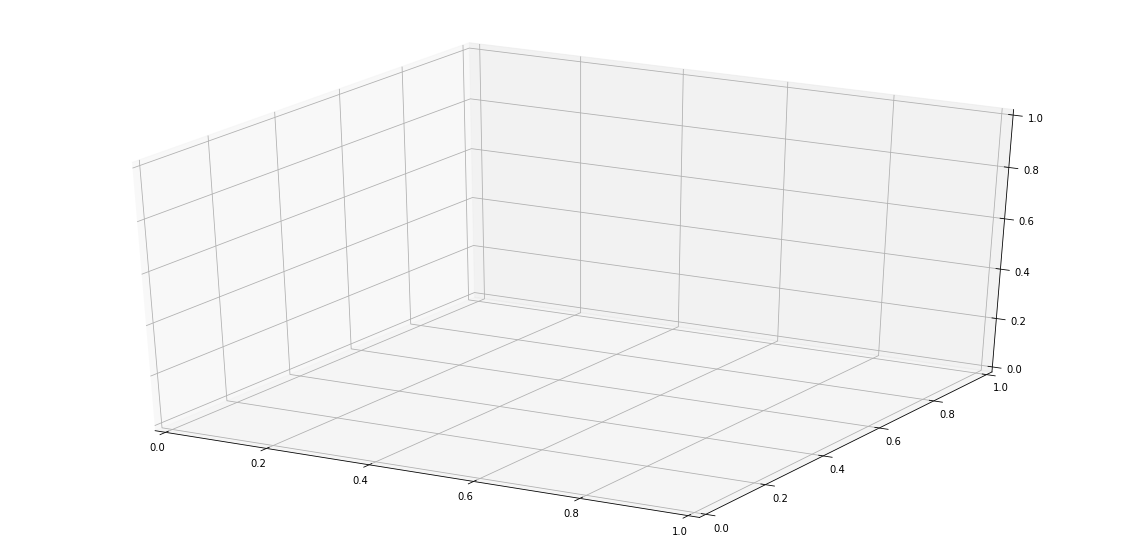

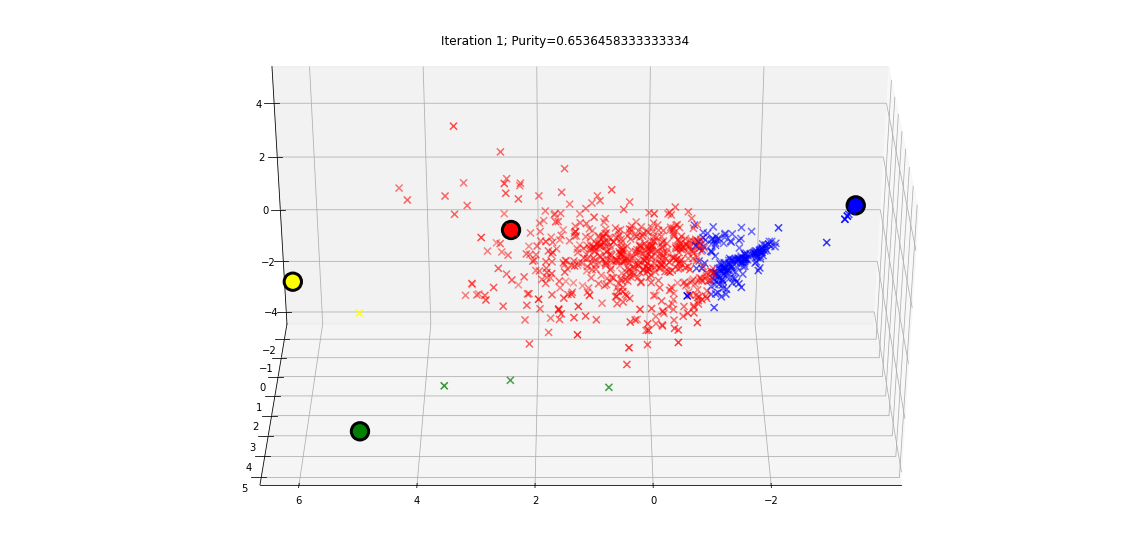

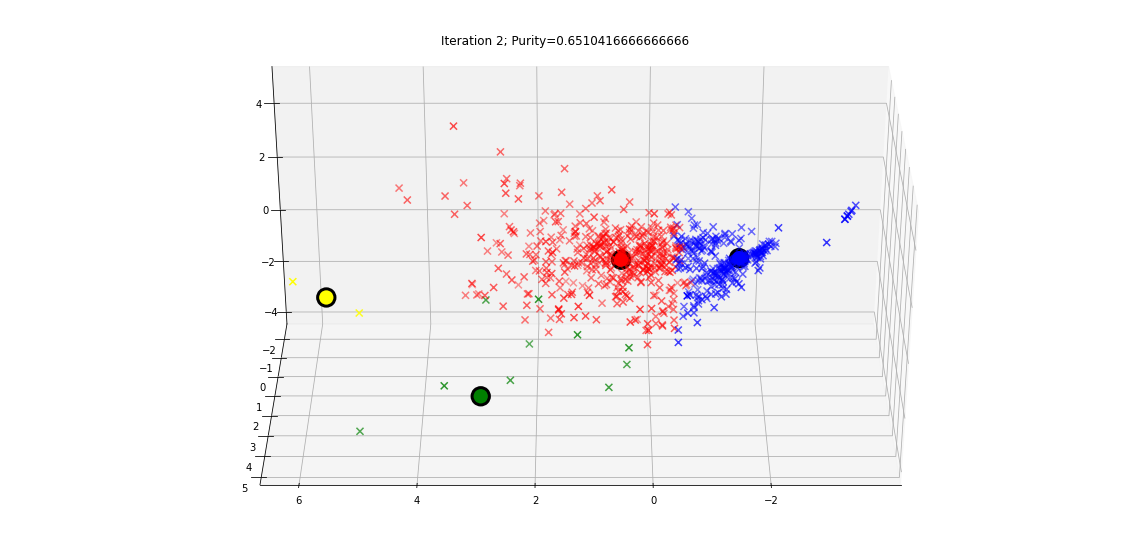

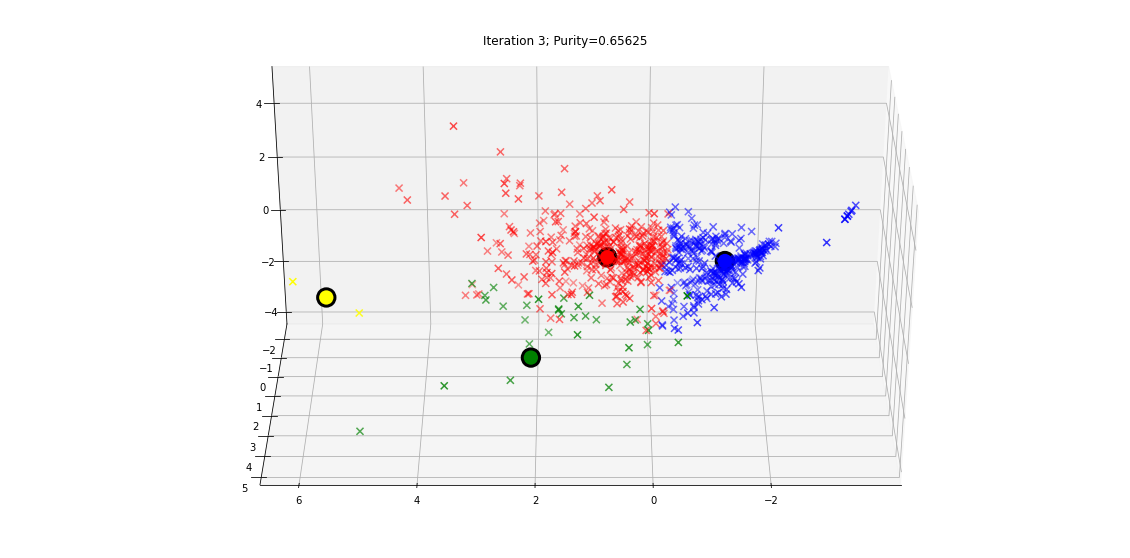

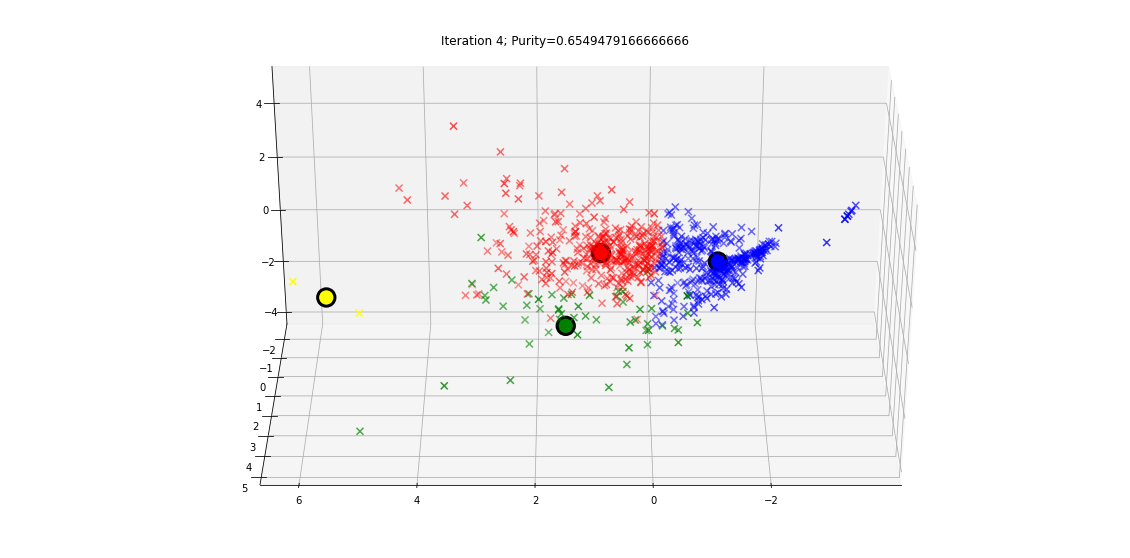

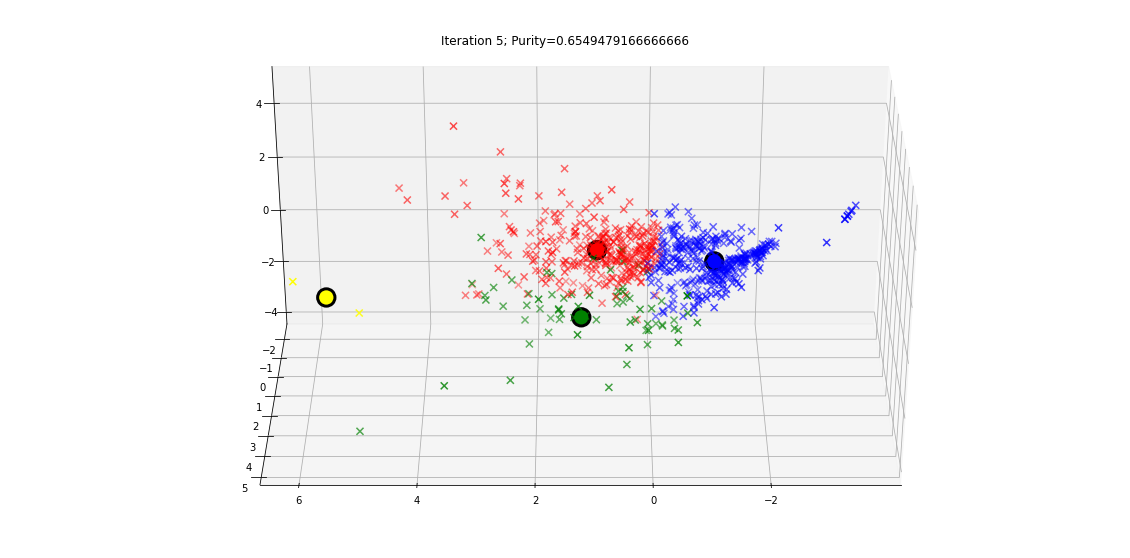

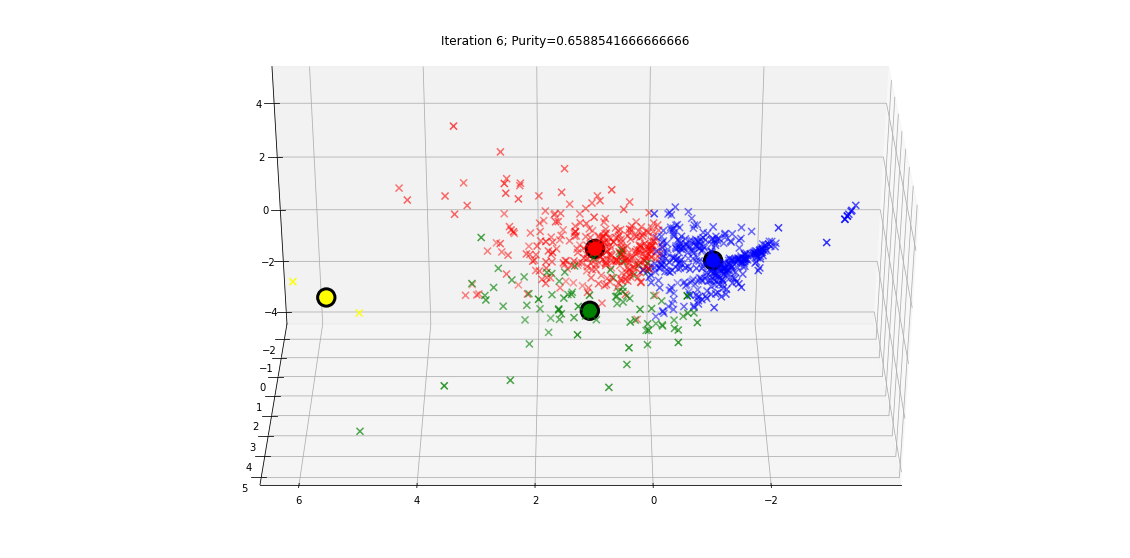

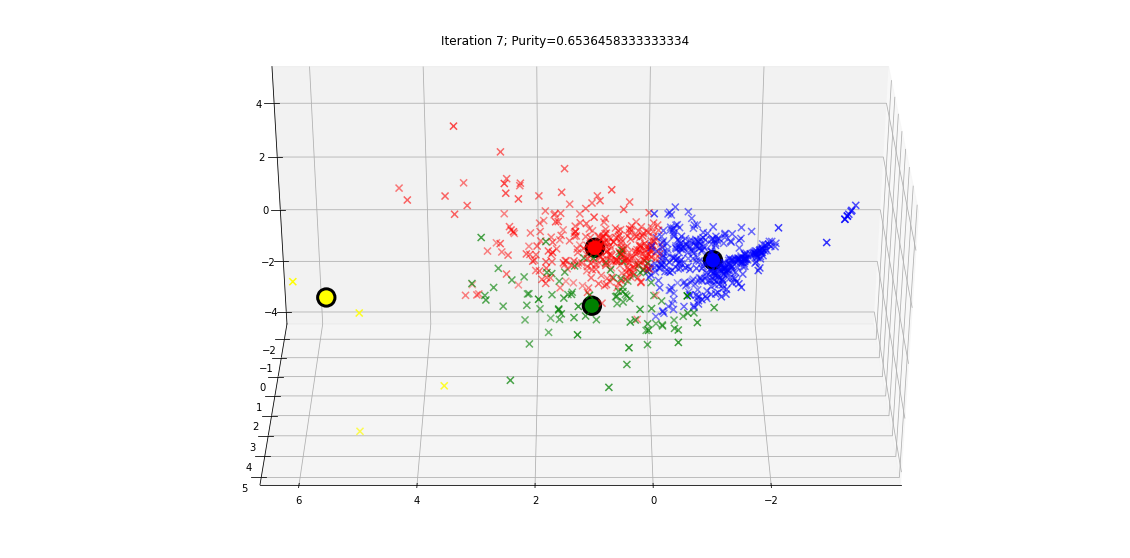

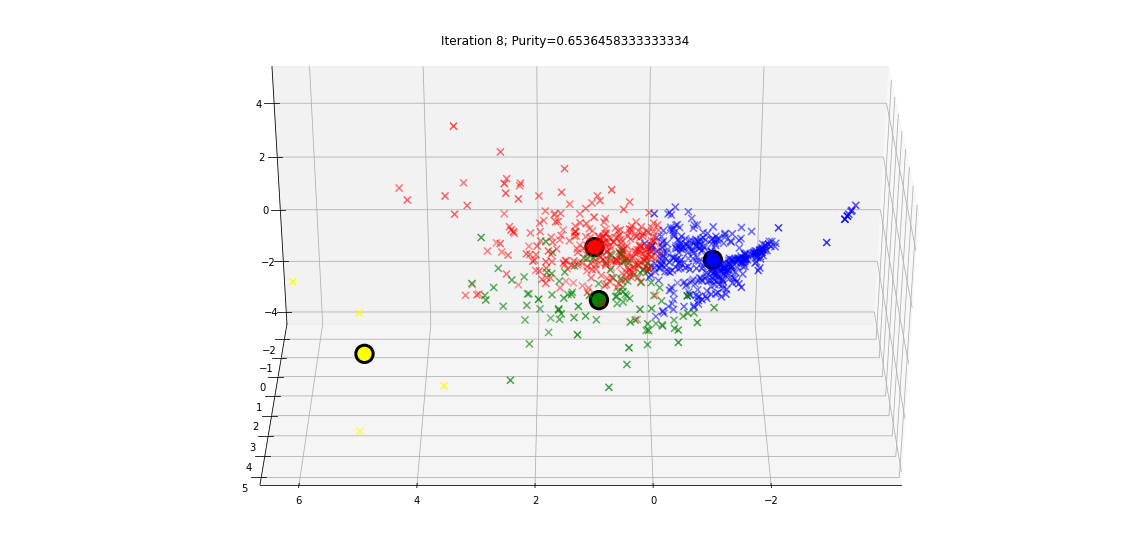

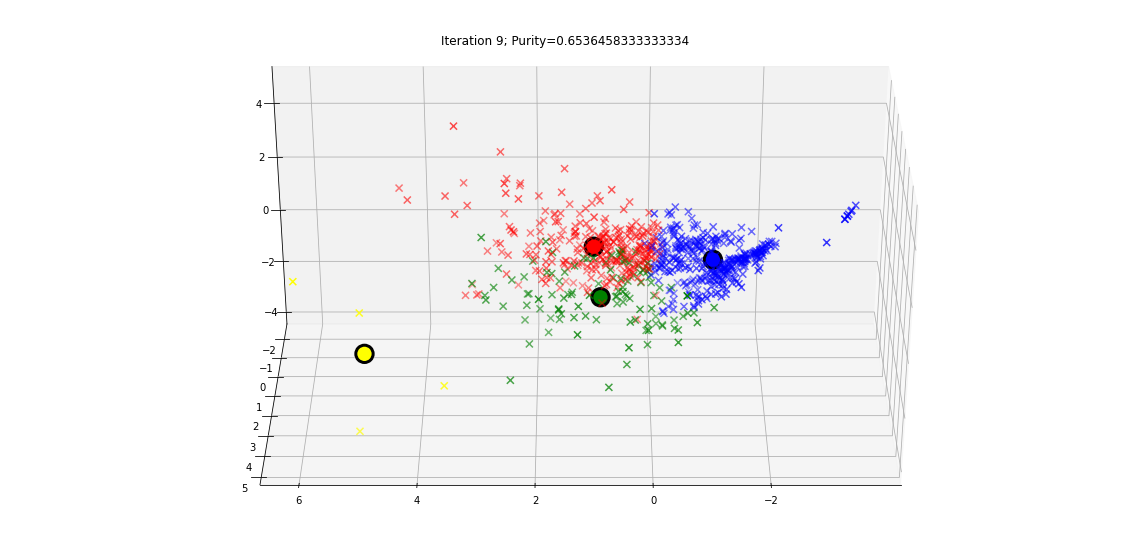

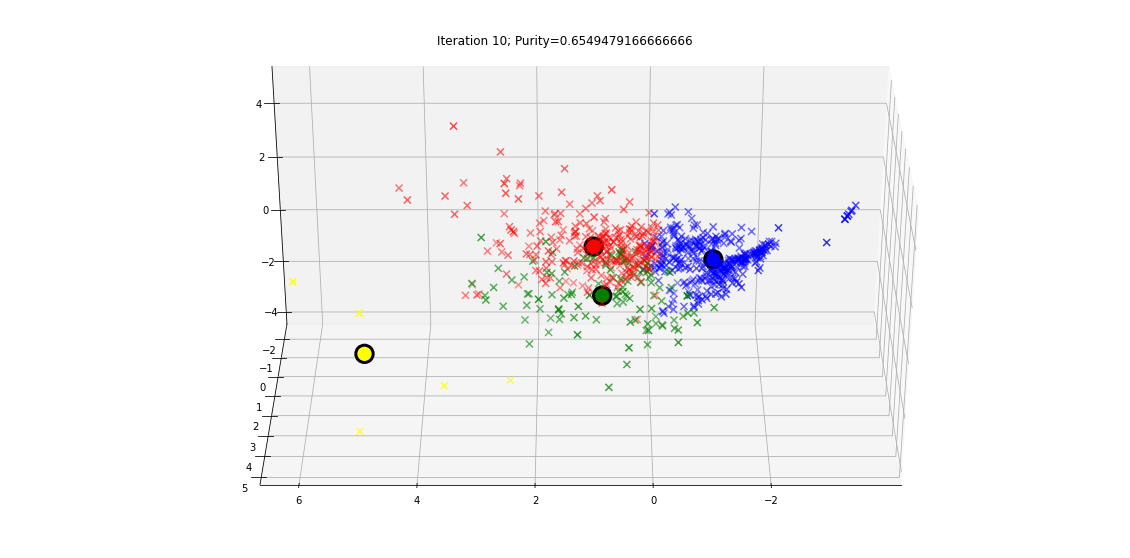

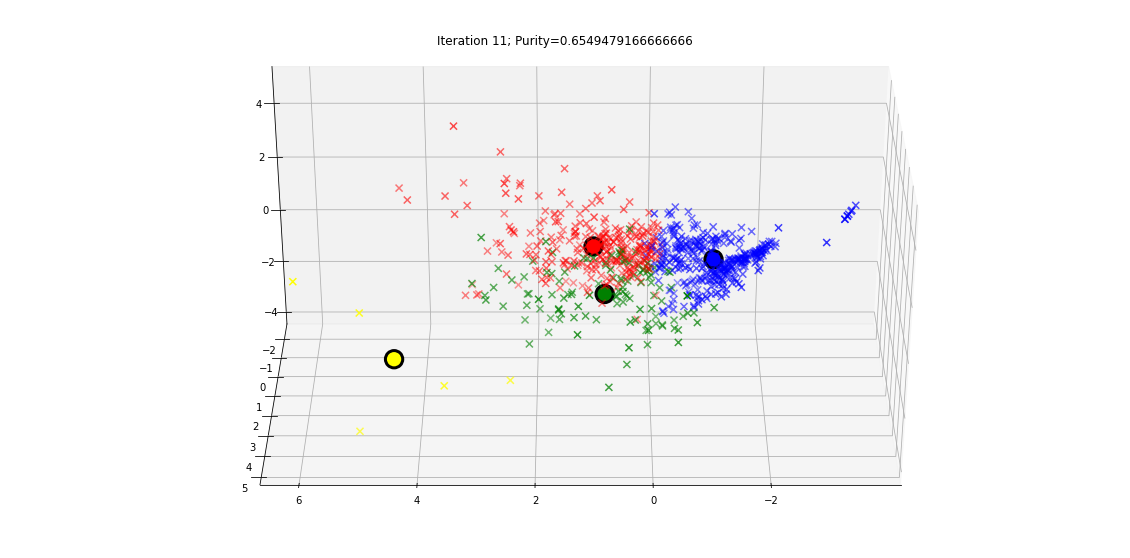

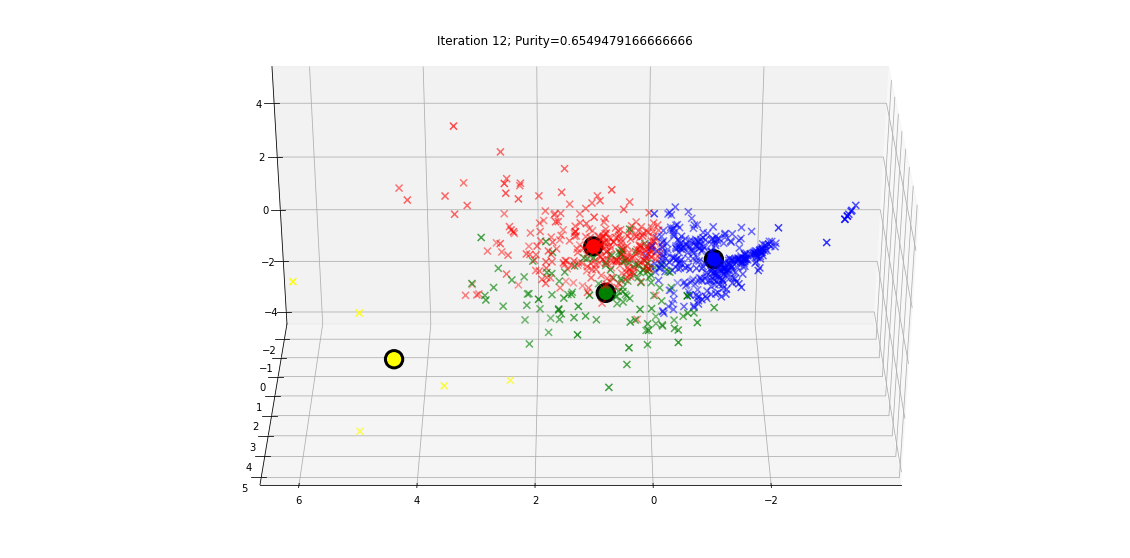

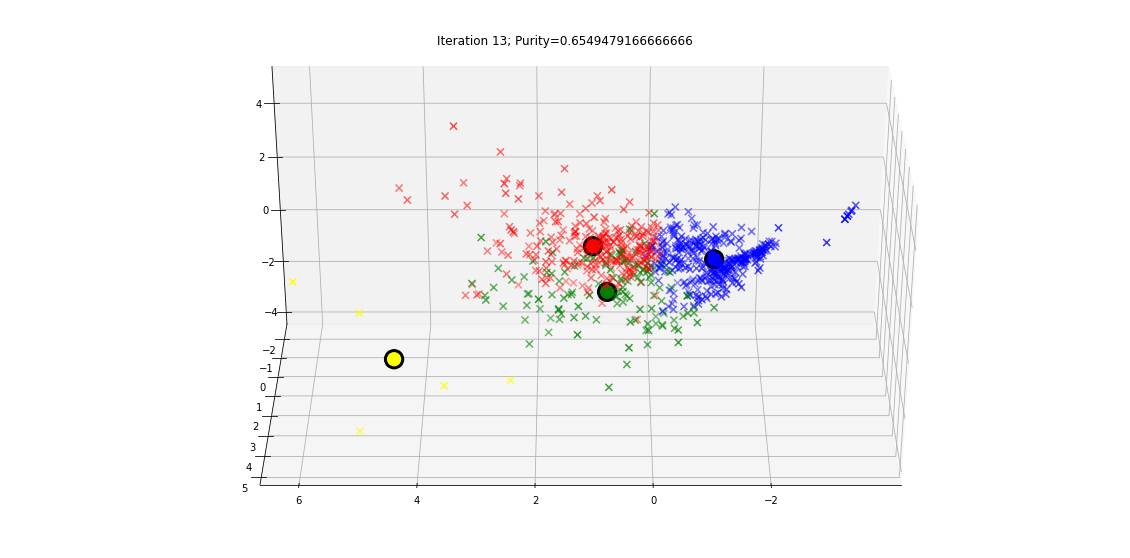

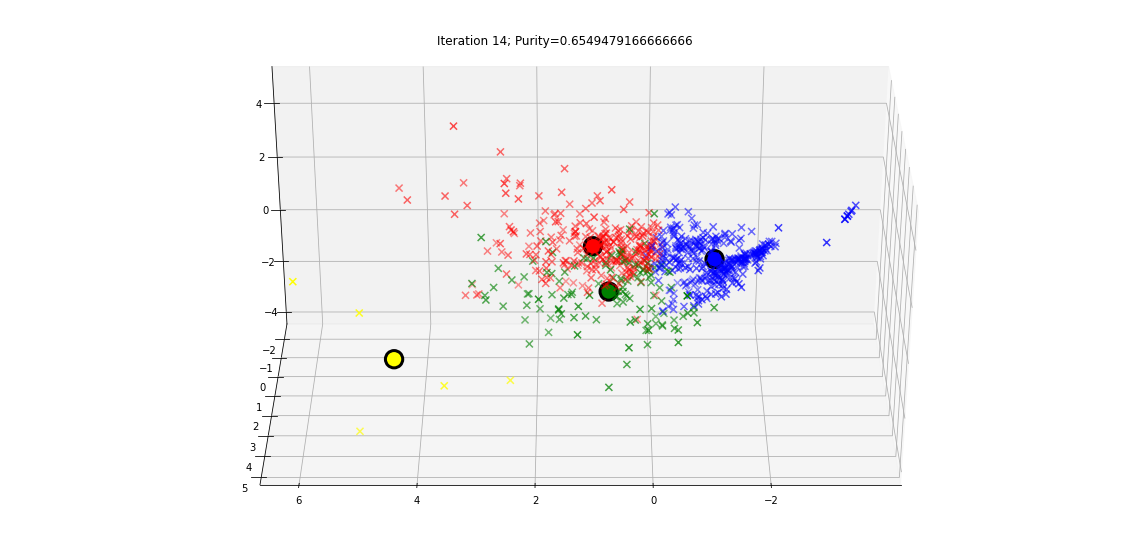

In [ ]:
myKMeans(x, y, 4)